In [1]:
"""
My first edition for covid 19 time series forcasting!
Todo list: 1-data prepration (DONE)
           2-building lstm module (DONE)
           3-building autoencoding module -
           4-buiding nlp module - (in progress)
           4.5- building multi-layer perceptron (in progress)
           5-prediction
           6-read articles about improving lstm module (for vector) *****
           7-adding new vector for temperature
           8-effects of new parameter for our case 
           9-the nature of algorithm (another approach)
           
"""

'\nMy first edition for covid 19 time series forcasting!\nTodo list: 1-data prepration (DONE)\n           2-building lstm module (DONE)\n           3-building autoencoding module -\n           4-buiding nlp module - (in progress)\n           4.5- building multi-layer perceptron (in progress)\n           5-prediction\n'

# ----------------------------------------------------------------------------------------------------------

# LSTM Module + Preprocessing

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import glob
import sklearn
import torch
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [131]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [185]:
df = pd.read_csv("time_series_covid_19_confirmed_US.csv", parse_dates=True, squeeze=True)

In [186]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,167,170,171,172,172,172,175,175,177,179
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,22,22,22,22,22,22,22,23,24,26
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,70,70,70,71


In [134]:
to_drop = ['iso2','iso3','code3','FIPS','Admin2','Lat','Long_','Combined_Key']
df.drop(to_drop, inplace = True, axis=1)

In [135]:
df.head(20)

,UID,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,16,American Samoa,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,316,Guam,US,0,0,0,0,0,0,0,...,167,170,171,172,172,172,175,175,177,179
2,580,Northern Mariana Islands,US,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,23,24,26
3,630,Puerto Rico,US,0,0,0,0,0,0,0,...,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508
4,850,Virgin Islands,US,0,0,0,0,0,0,0,...,69,69,69,69,69,69,70,70,70,71
5,84001001,Alabama,US,0,0,0,0,0,0,0,...,189,192,205,212,216,221,233,239,239,241
6,84001003,Alabama,US,0,0,0,0,0,0,0,...,277,282,281,282,283,290,292,292,292,293
7,84001005,Alabama,US,0,0,0,0,0,0,0,...,122,130,132,147,150,167,172,175,177,177
8,84001007,Alabama,US,0,0,0,0,0,0,0,...,66,71,71,71,72,75,76,76,76,76
9,84001009,Alabama,US,0,0,0,0,0,0,0,...,51,53,58,60,61,62,63,63,63,63


In [136]:
df_lstm = df
to_drop2 = ['Province_State','Country_Region']
df.drop(to_drop2, inplace = True, axis=1)

In [137]:
df_lstm = df_lstm.iloc[:,60:]

In [138]:
df_lstm.head(40)

,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,...,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,27,29,32,37,45,51,55,56,58,...,167,170,171,172,172,172,175,175,177,179
2,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,23,24,26
3,21,23,31,39,51,64,79,100,127,174,...,3324,3397,3486,3647,3718,3776,3873,3935,4023,4508
4,6,6,7,17,17,17,19,22,23,30,...,69,69,69,69,69,69,70,70,70,71
5,0,0,0,1,4,6,6,6,6,6,...,189,192,205,212,216,221,233,239,239,241
6,2,2,3,4,4,5,5,10,15,18,...,277,282,281,282,283,290,292,292,292,293
7,0,0,0,0,0,0,0,0,0,0,...,122,130,132,147,150,167,172,175,177,177
8,0,0,0,0,0,0,0,0,0,2,...,66,71,71,71,72,75,76,76,76,76
9,0,0,0,0,1,2,4,5,5,5,...,51,53,58,60,61,62,63,63,63,63


In [139]:
df_lstm.isnull().sum().sum()

0

In [140]:
daily_cases = df_lstm.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head(20)

2020-03-21     25725
2020-03-22     33638
2020-03-23     43682
2020-03-24     53925
2020-03-25     65844
2020-03-26     83836
2020-03-27    101962
2020-03-28    121786
2020-03-29    140910
2020-03-30    162147
2020-03-31    188172
2020-04-01    213602
2020-04-02    244008
2020-04-03    275798
2020-04-04    309027
2020-04-05    336802
2020-04-06    366317
2020-04-07    397121
2020-04-08    428654
2020-04-09    463327
dtype: int64

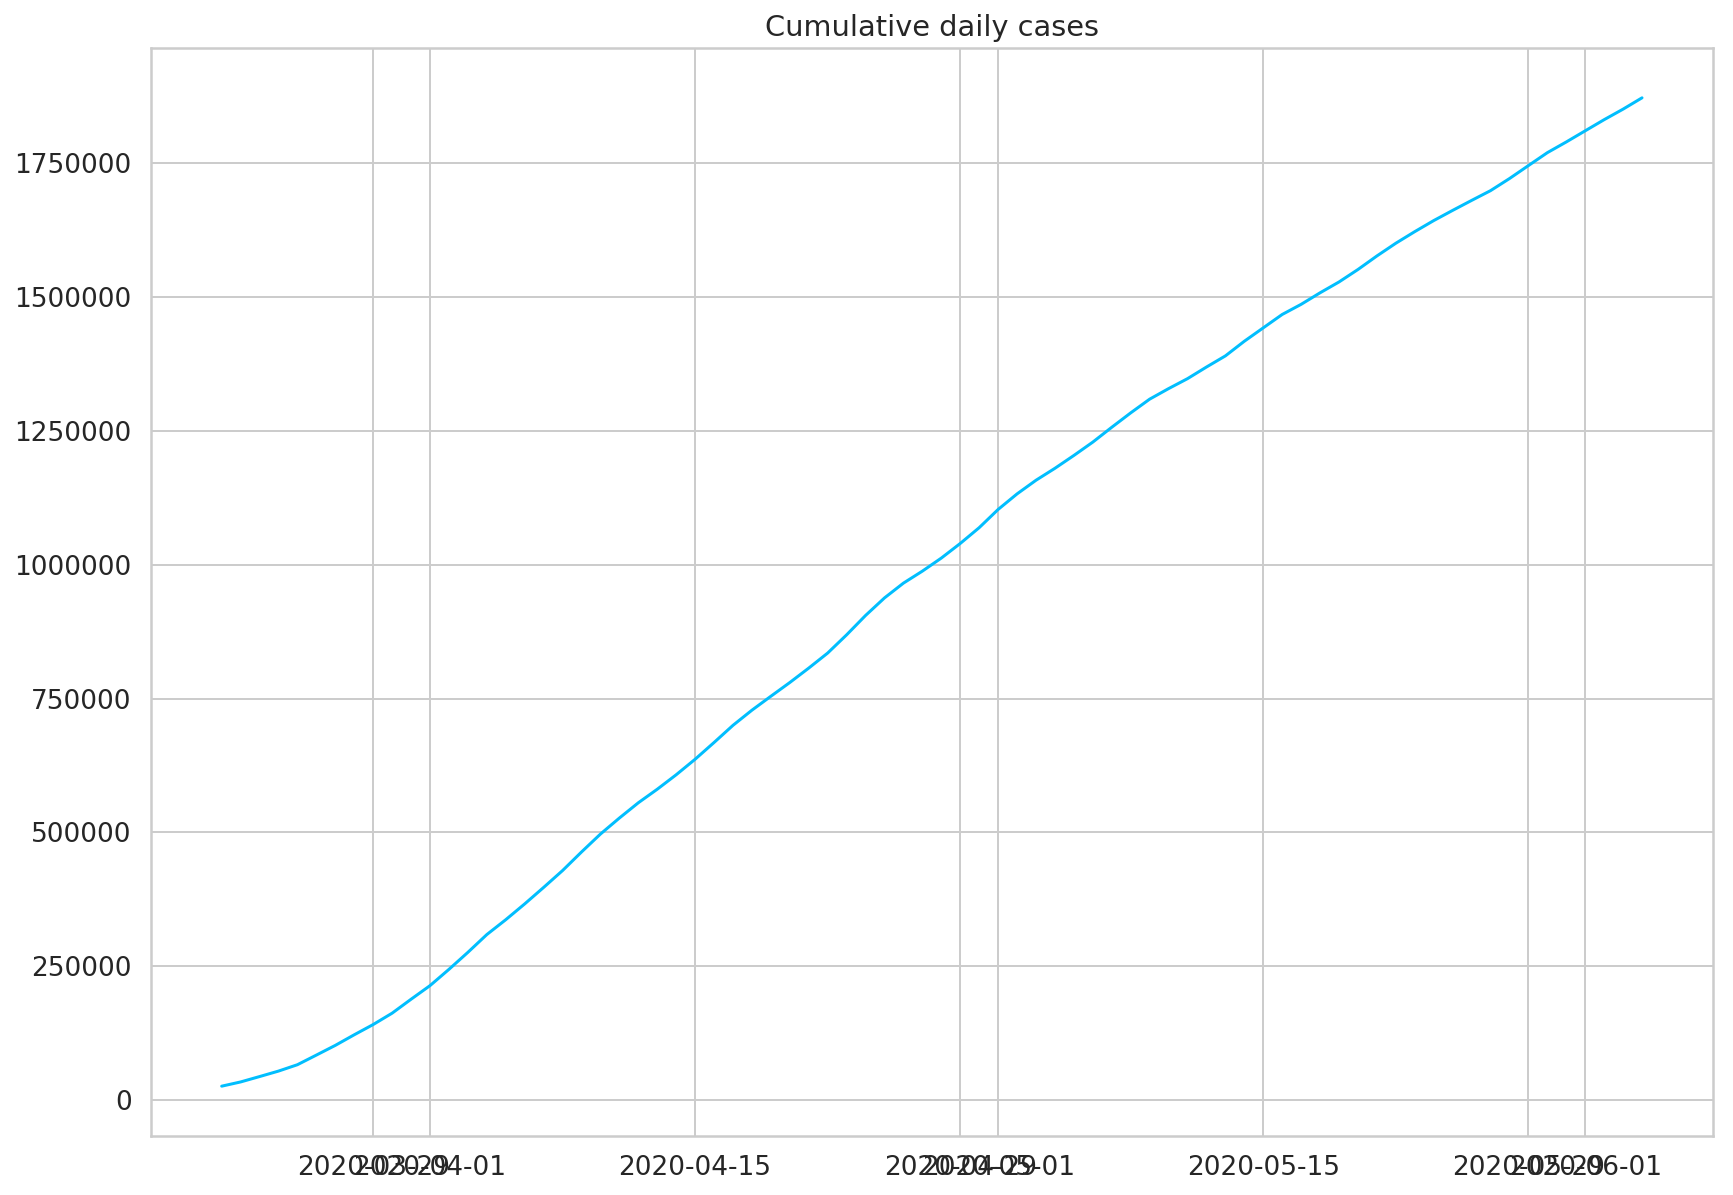

In [141]:
plt.plot(daily_cases)
plt.title("Cumulative daily cases");

In [142]:
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head()

2020-03-21    25725
2020-03-22     7913
2020-03-23    10044
2020-03-24    10243
2020-03-25    11919
dtype: int64

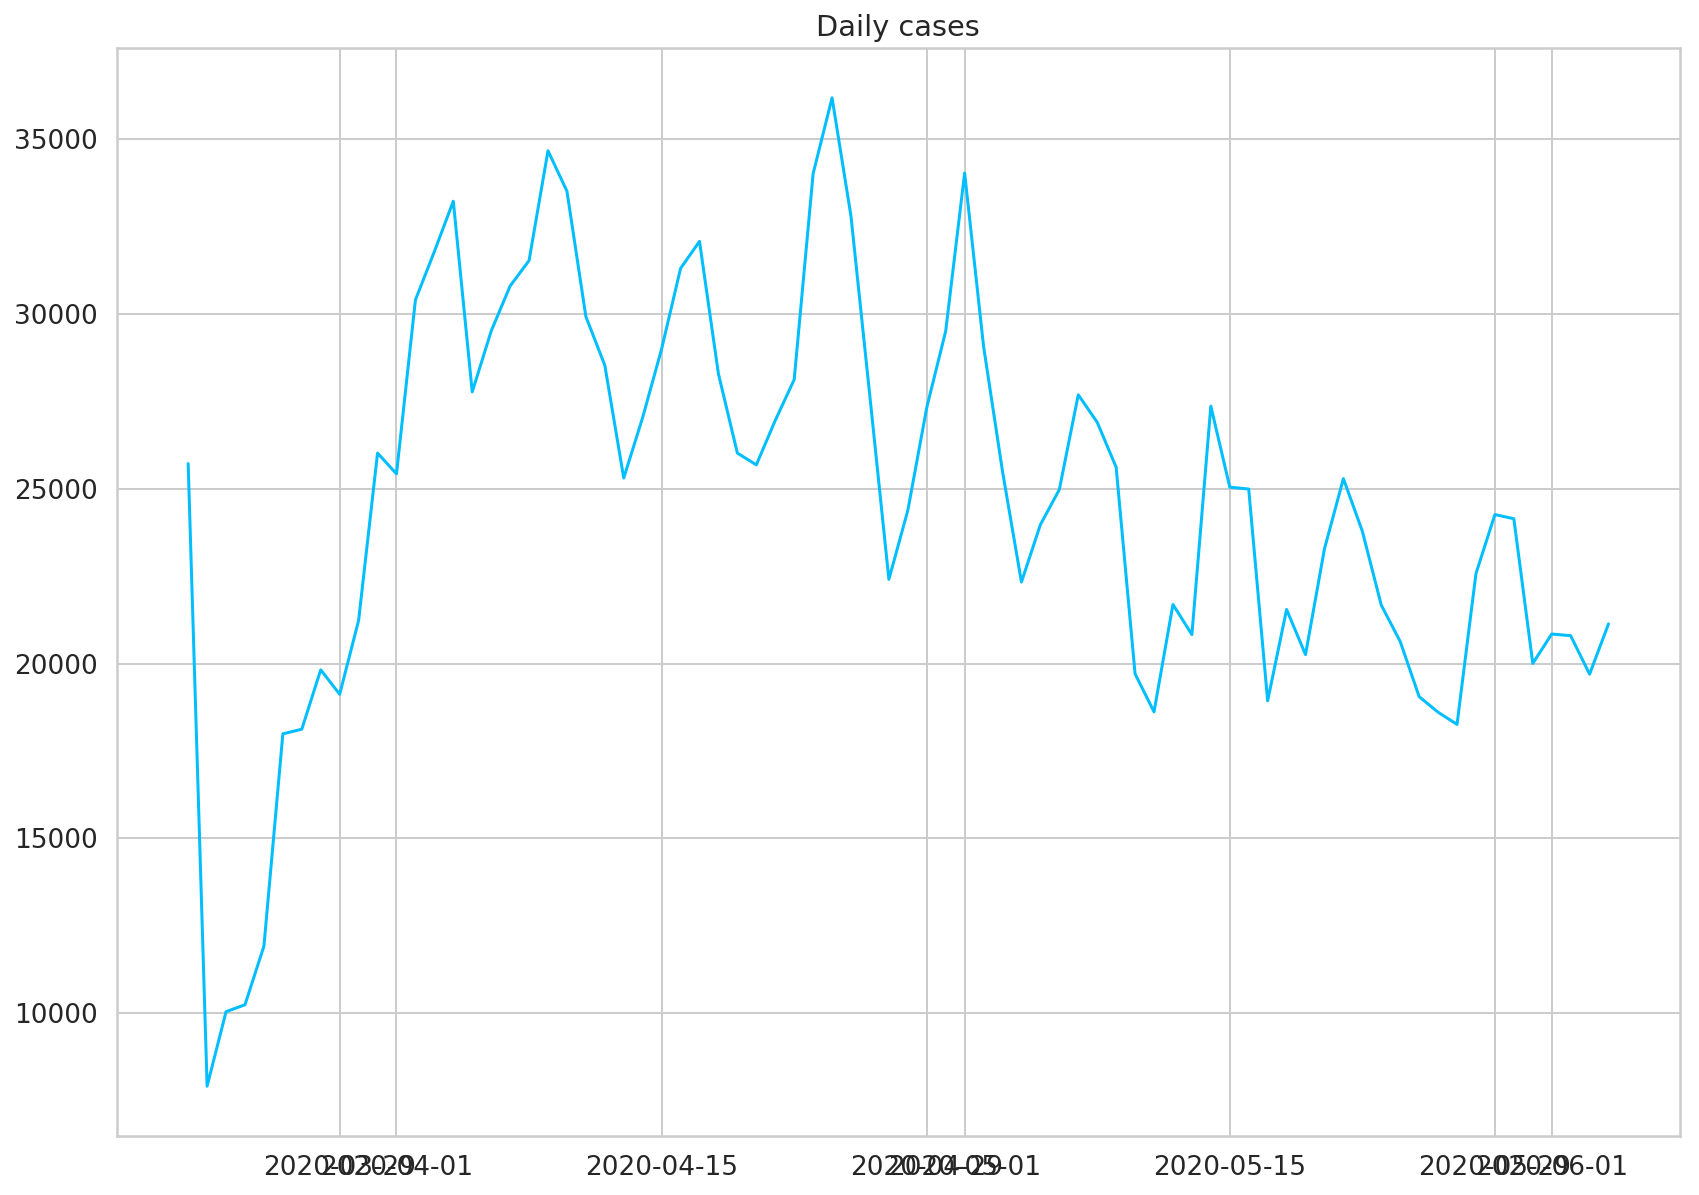

In [143]:
plt.plot(daily_cases)
plt.title("Daily cases");

In [144]:
daily_cases.shape

(76,)

In [145]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [146]:
test_data_size = 18
train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

train_data.shape

(58,)

In [147]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

/home/yazdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [149]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [150]:
X_train.shape

torch.Size([52, 5, 1])

In [151]:
X_train.to(device)

tensor([[[0.6300],
         [0.0000],
         [0.0754],
         [0.0824],
         [0.1417]],

        [[0.0000],
         [0.0754],
         [0.0824],
         [0.1417],
         [0.3565]],

        [[0.0754],
         [0.0824],
         [0.1417],
         [0.3565],
         [0.3612]],

        [[0.0824],
         [0.1417],
         [0.3565],
         [0.3612],
         [0.4213]],

        [[0.1417],
         [0.3565],
         [0.3612],
         [0.4213],
         [0.3965]],

        [[0.3565],
         [0.3612],
         [0.4213],
         [0.3965],
         [0.4712]],

        [[0.3612],
         [0.4213],
         [0.3965],
         [0.4712],
         [0.6406]],

        [[0.4213],
         [0.3965],
         [0.4712],
         [0.6406],
         [0.6195]],

        [[0.3965],
         [0.4712],
         [0.6406],
         [0.6195],
         [0.7955]],

        [[0.4712],
         [0.6406],
         [0.6195],
         [0.7955],
         [0.8445]],

        [[0.6406],
         [0

In [152]:
X_test.to(device)

tensor([[[0.4823],
         [0.4367],
         [0.5437],
         [0.6147],
         [0.5615]],

        [[0.4367],
         [0.5437],
         [0.6147],
         [0.5615],
         [0.4867]],

        [[0.5437],
         [0.6147],
         [0.5615],
         [0.4867],
         [0.4499]],

        [[0.6147],
         [0.5615],
         [0.4867],
         [0.4499],
         [0.3941]],

        [[0.5615],
         [0.4867],
         [0.4499],
         [0.3941],
         [0.3784]],

        [[0.4867],
         [0.4499],
         [0.3941],
         [0.3784],
         [0.3660]],

        [[0.4499],
         [0.3941],
         [0.3784],
         [0.3660],
         [0.5186]],

        [[0.3941],
         [0.3784],
         [0.3660],
         [0.5186],
         [0.5784]],

        [[0.3784],
         [0.3660],
         [0.5186],
         [0.5784],
         [0.5741]],

        [[0.3660],
         [0.5186],
         [0.5784],
         [0.5741],
         [0.4277]],

        [[0.5186],
         [0

In [153]:
X_train[:4]

tensor([[[0.6300],
         [0.0000],
         [0.0754],
         [0.0824],
         [0.1417]],

        [[0.0000],
         [0.0754],
         [0.0824],
         [0.1417],
         [0.3565]],

        [[0.0754],
         [0.0824],
         [0.1417],
         [0.3565],
         [0.3612]],

        [[0.0824],
         [0.1417],
         [0.3565],
         [0.3612],
         [0.4213]]])

In [154]:
y_train.shape

torch.Size([52, 1])

In [155]:
y_train.to(device)

tensor([[0.3565],
        [0.3612],
        [0.4213],
        [0.3965],
        [0.4712],
        [0.6406],
        [0.6195],
        [0.7955],
        [0.8445],
        [0.8953],
        [0.7025],
        [0.7640],
        [0.8096],
        [0.8354],
        [0.9464],
        [0.9056],
        [0.7787],
        [0.7294],
        [0.6153],
        [0.6767],
        [0.7459],
        [0.8274],
        [0.8547],
        [0.7207],
        [0.6405],
        [0.6286],
        [0.6736],
        [0.7149],
        [0.9233],
        [1.0000],
        [0.8800],
        [0.6974],
        [0.5128],
        [0.5826],
        [0.6866],
        [0.7640],
        [0.9239],
        [0.7485],
        [0.6220],
        [0.5101],
        [0.5681],
        [0.6036],
        [0.6995],
        [0.6717],
        [0.6263],
        [0.4172],
        [0.3787],
        [0.4874],
        [0.4569],
        [0.6881],
        [0.6061],
        [0.6042]], device='cuda:0')

In [156]:
y_train[:2]

tensor([[0.3565],
        [0.3612]])

In [157]:
train_data[:10]

array([[0.62995579],
       [0.        ],
       [0.07536693],
       [0.08240495],
       [0.14167993],
       [0.35646331],
       [0.36120248],
       [0.42125553],
       [0.39649867],
       [0.471229  ]])

In [158]:
y_test.to(device)

tensor([[0.4867],
        [0.4499],
        [0.3941],
        [0.3784],
        [0.3660],
        [0.5186],
        [0.5784],
        [0.5741],
        [0.4277],
        [0.4575],
        [0.4558],
        [0.4168]], device='cuda:0')

In [159]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [160]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

In [161]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 23.798965454101562 test loss: 2.4160730838775635
Epoch 10 train loss: 1.7760932445526123 test loss: 1.0207374095916748
Epoch 20 train loss: 1.4667764902114868 test loss: 0.8508866429328918
Epoch 30 train loss: 1.3896998167037964 test loss: 0.6857577562332153
Epoch 40 train loss: 1.3378292322158813 test loss: 0.6445547938346863
Epoch 50 train loss: 1.340212106704712 test loss: 0.5193778872489929
Epoch 60 train loss: 1.4025934934616089 test loss: 0.5386372208595276
Epoch 70 train loss: 1.3624675273895264 test loss: 0.5439113974571228
Epoch 80 train loss: 1.3531577587127686 test loss: 0.5437824726104736
Epoch 90 train loss: 1.3650380373001099 test loss: 0.5319167375564575


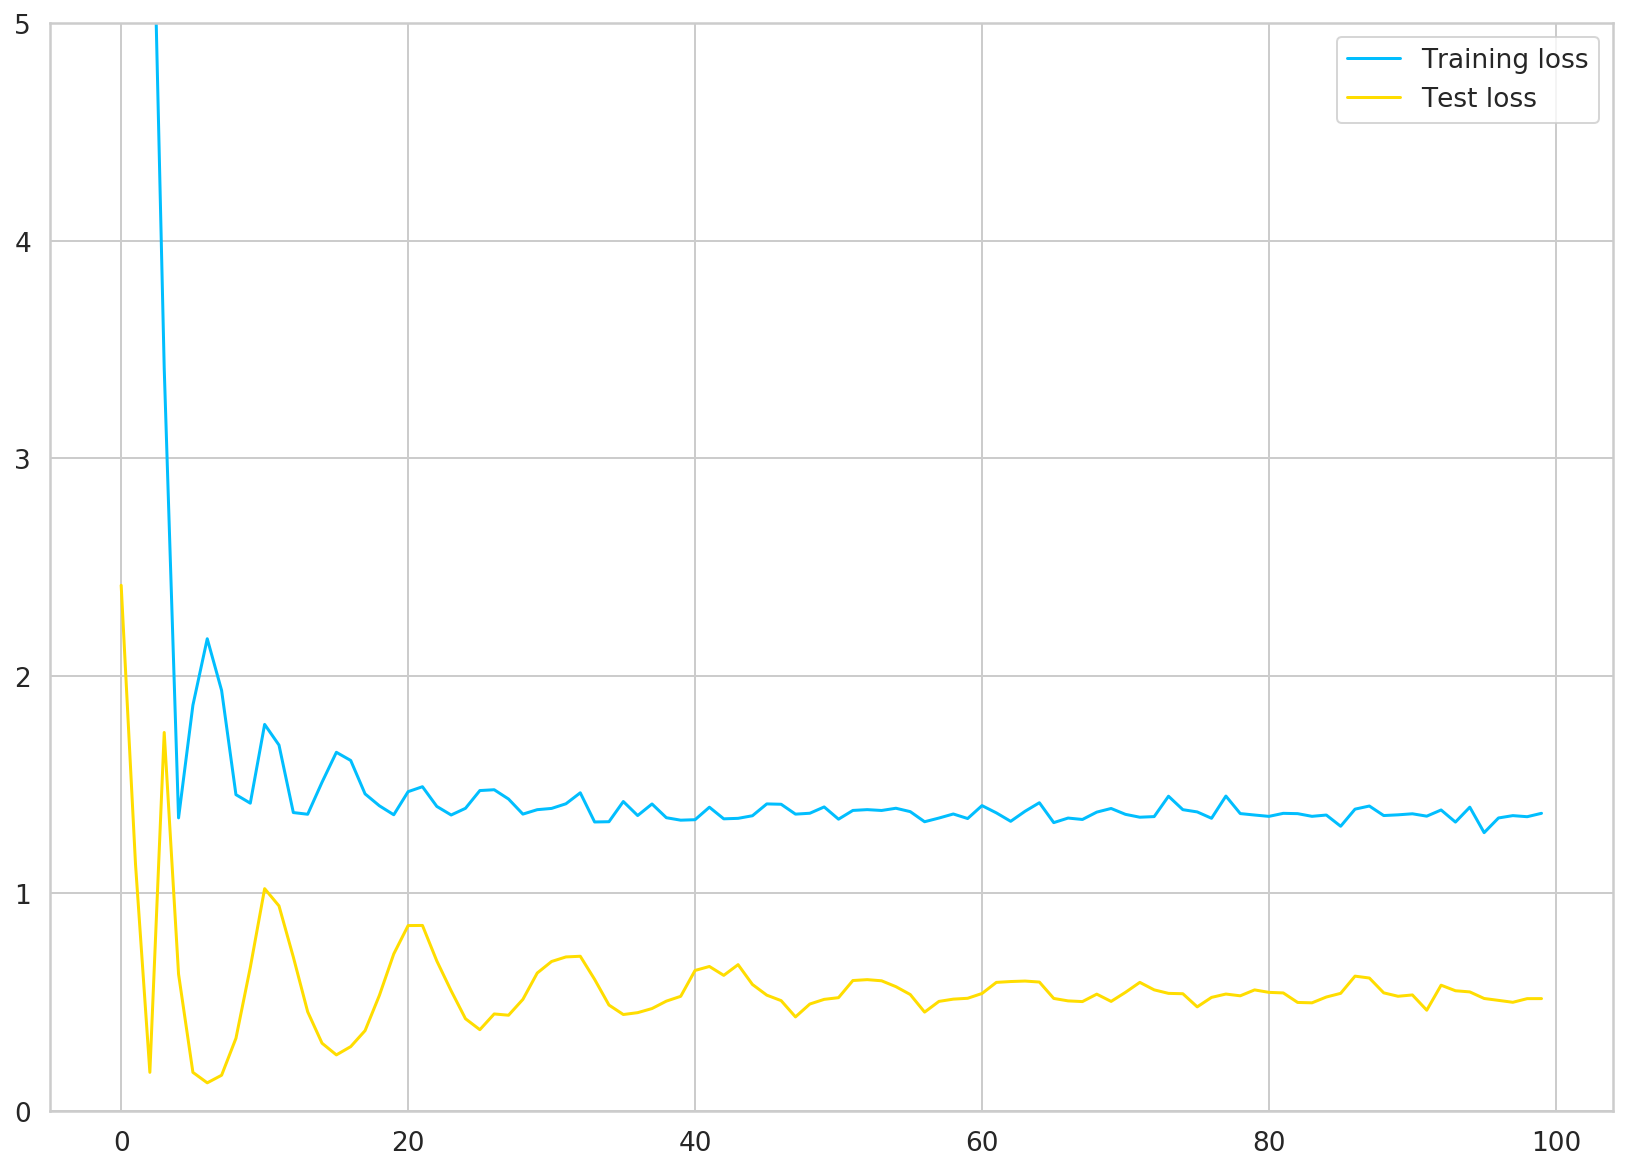

In [162]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

In [163]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [164]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

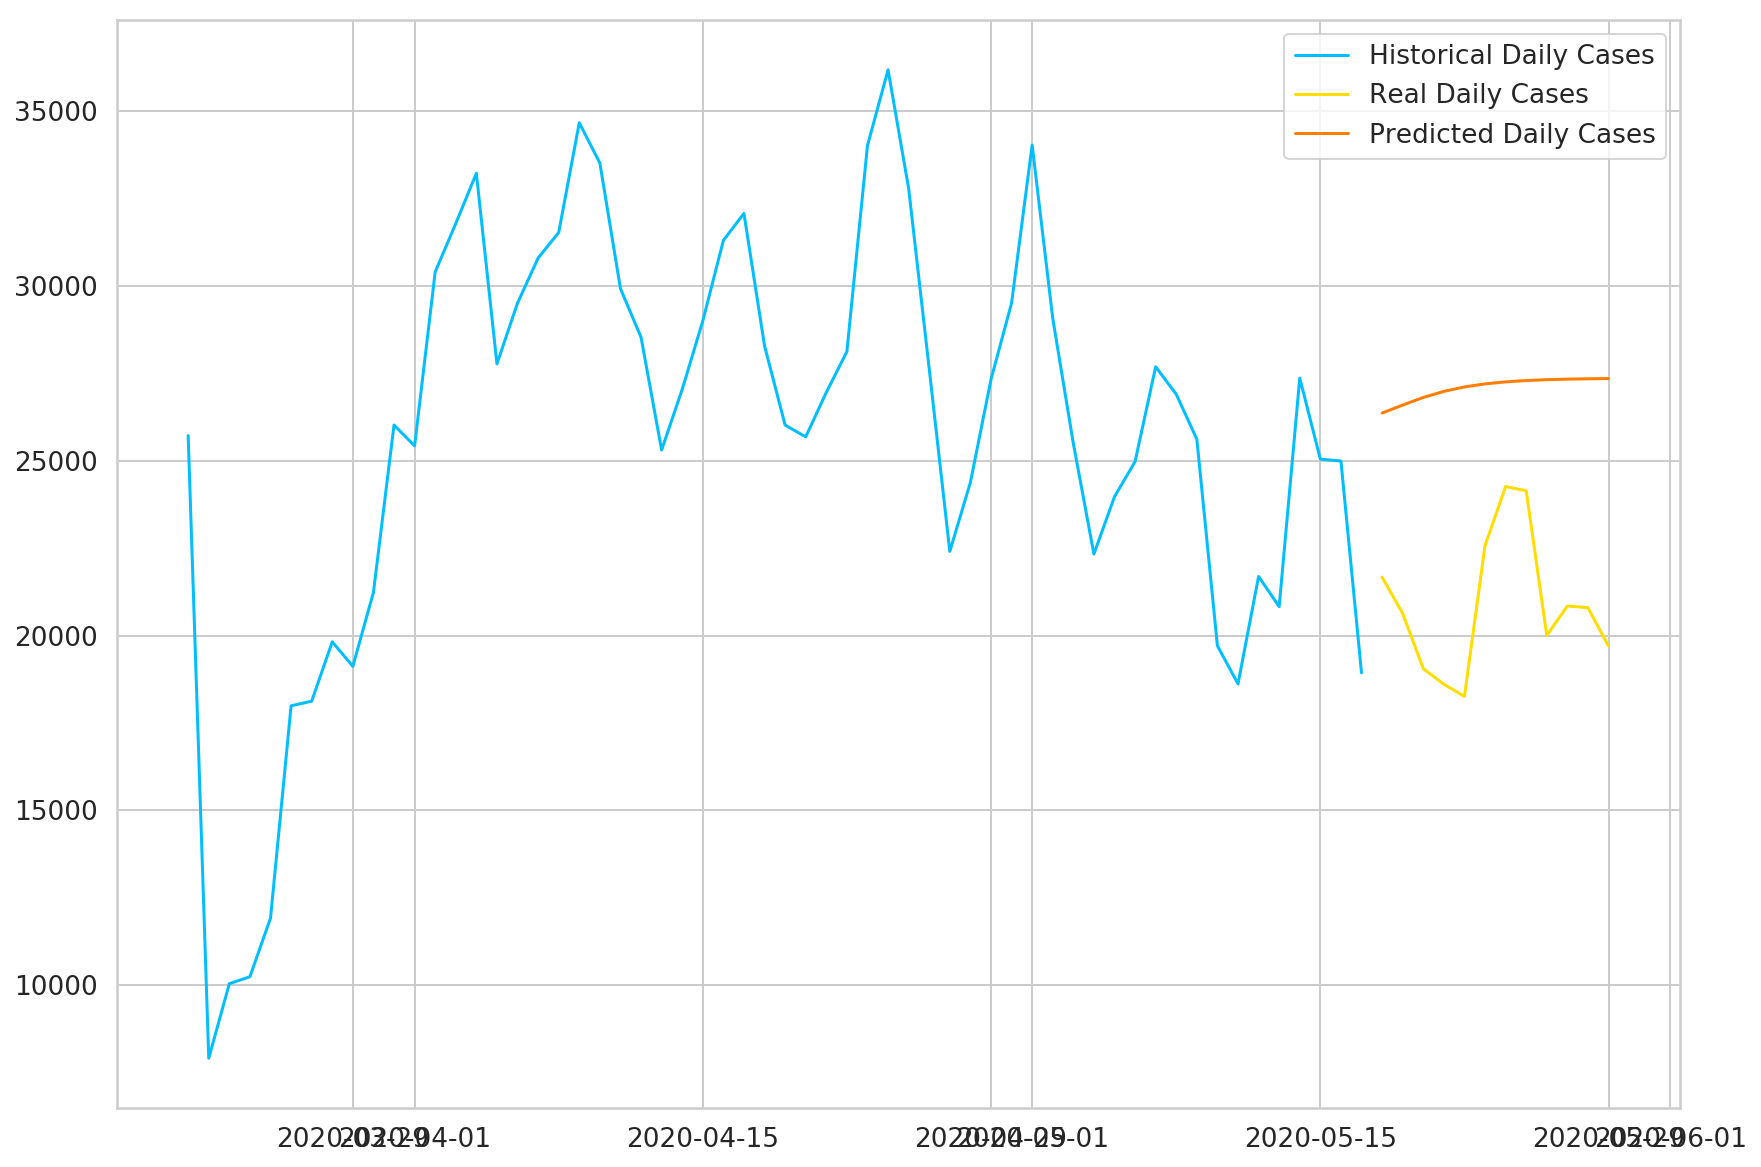

In [165]:
plt.plot(
  daily_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [166]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_cases, axis=1))

all_data.shape

/home/yazdan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(76, 1)

In [167]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 20.797657012939453
Epoch 10 train loss: 1.8685780763626099
Epoch 20 train loss: 1.7922348976135254
Epoch 30 train loss: 1.4343366622924805
Epoch 40 train loss: 1.333498477935791
Epoch 50 train loss: 1.3744683265686035
Epoch 60 train loss: 1.3283228874206543
Epoch 70 train loss: 1.3597902059555054
Epoch 80 train loss: 1.3721116781234741
Epoch 90 train loss: 1.330068588256836


In [172]:
DAYS_TO_PREDICT = 12

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [173]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [174]:
daily_cases.index[-1]

Timestamp('2020-06-04 00:00:00')

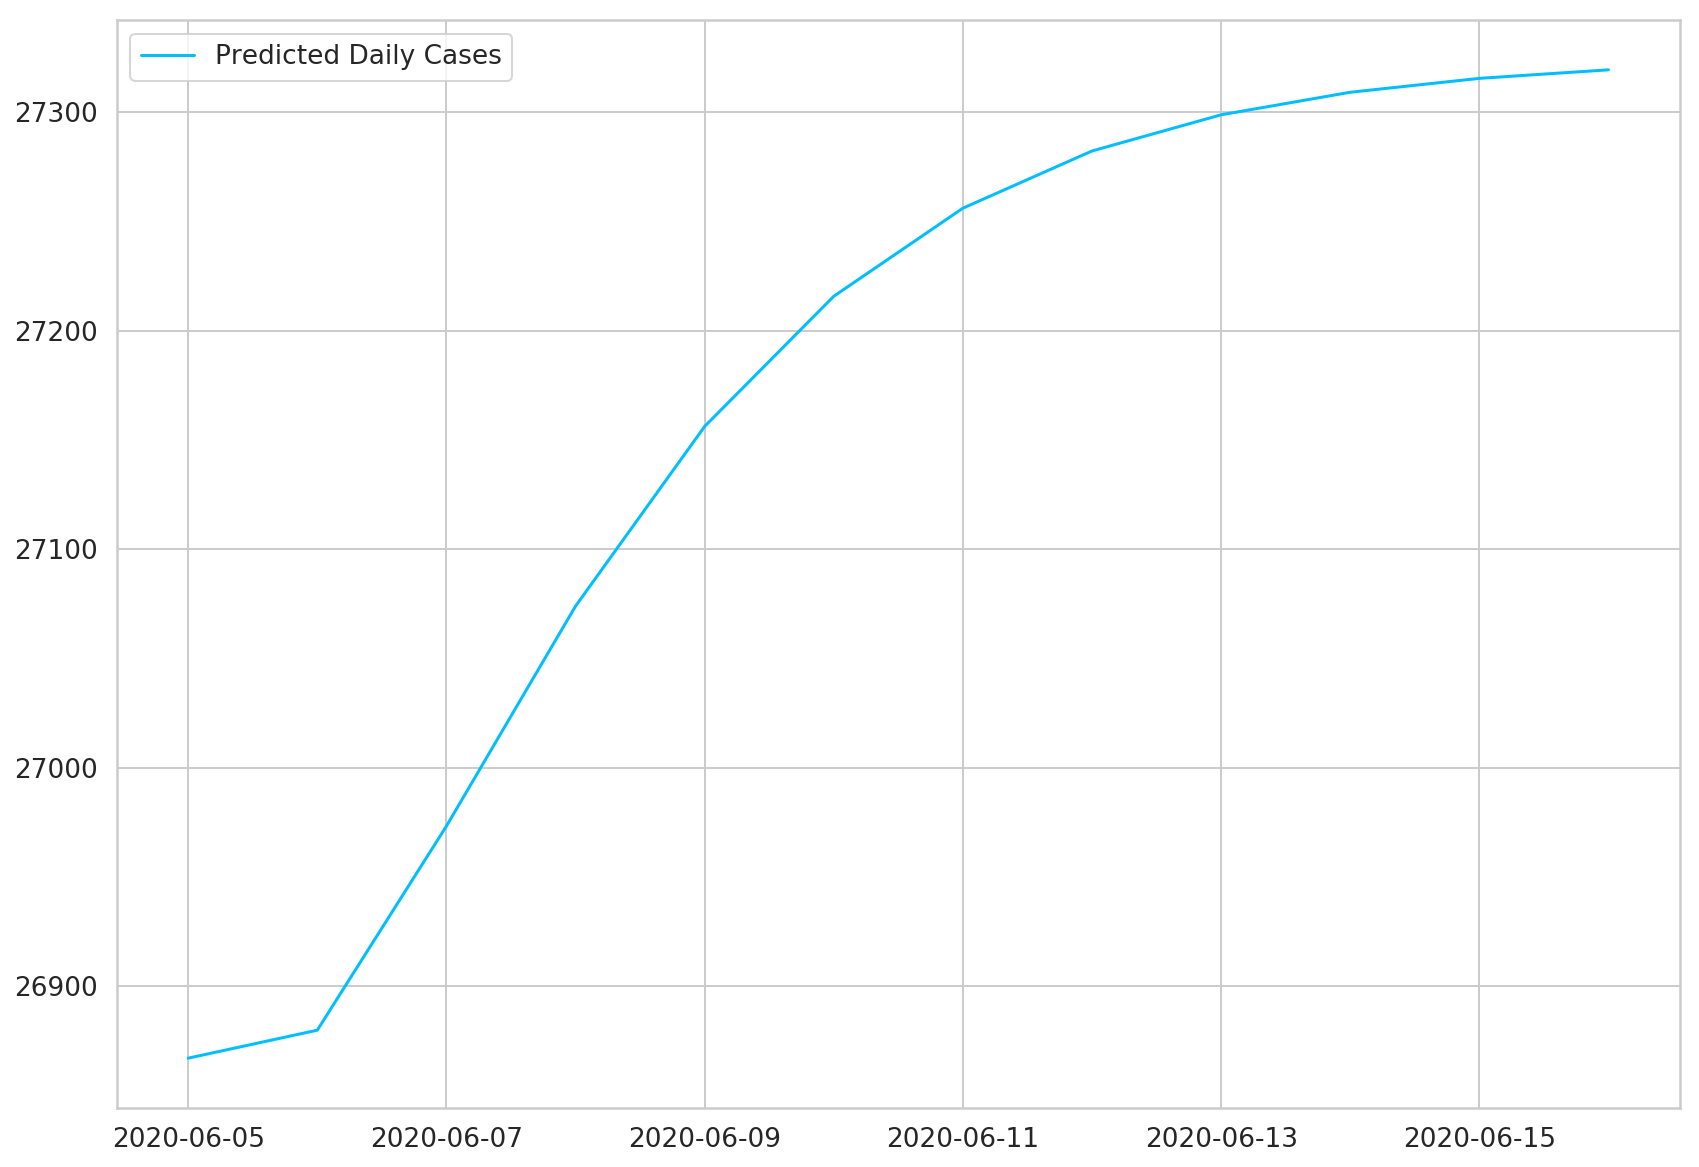

In [175]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

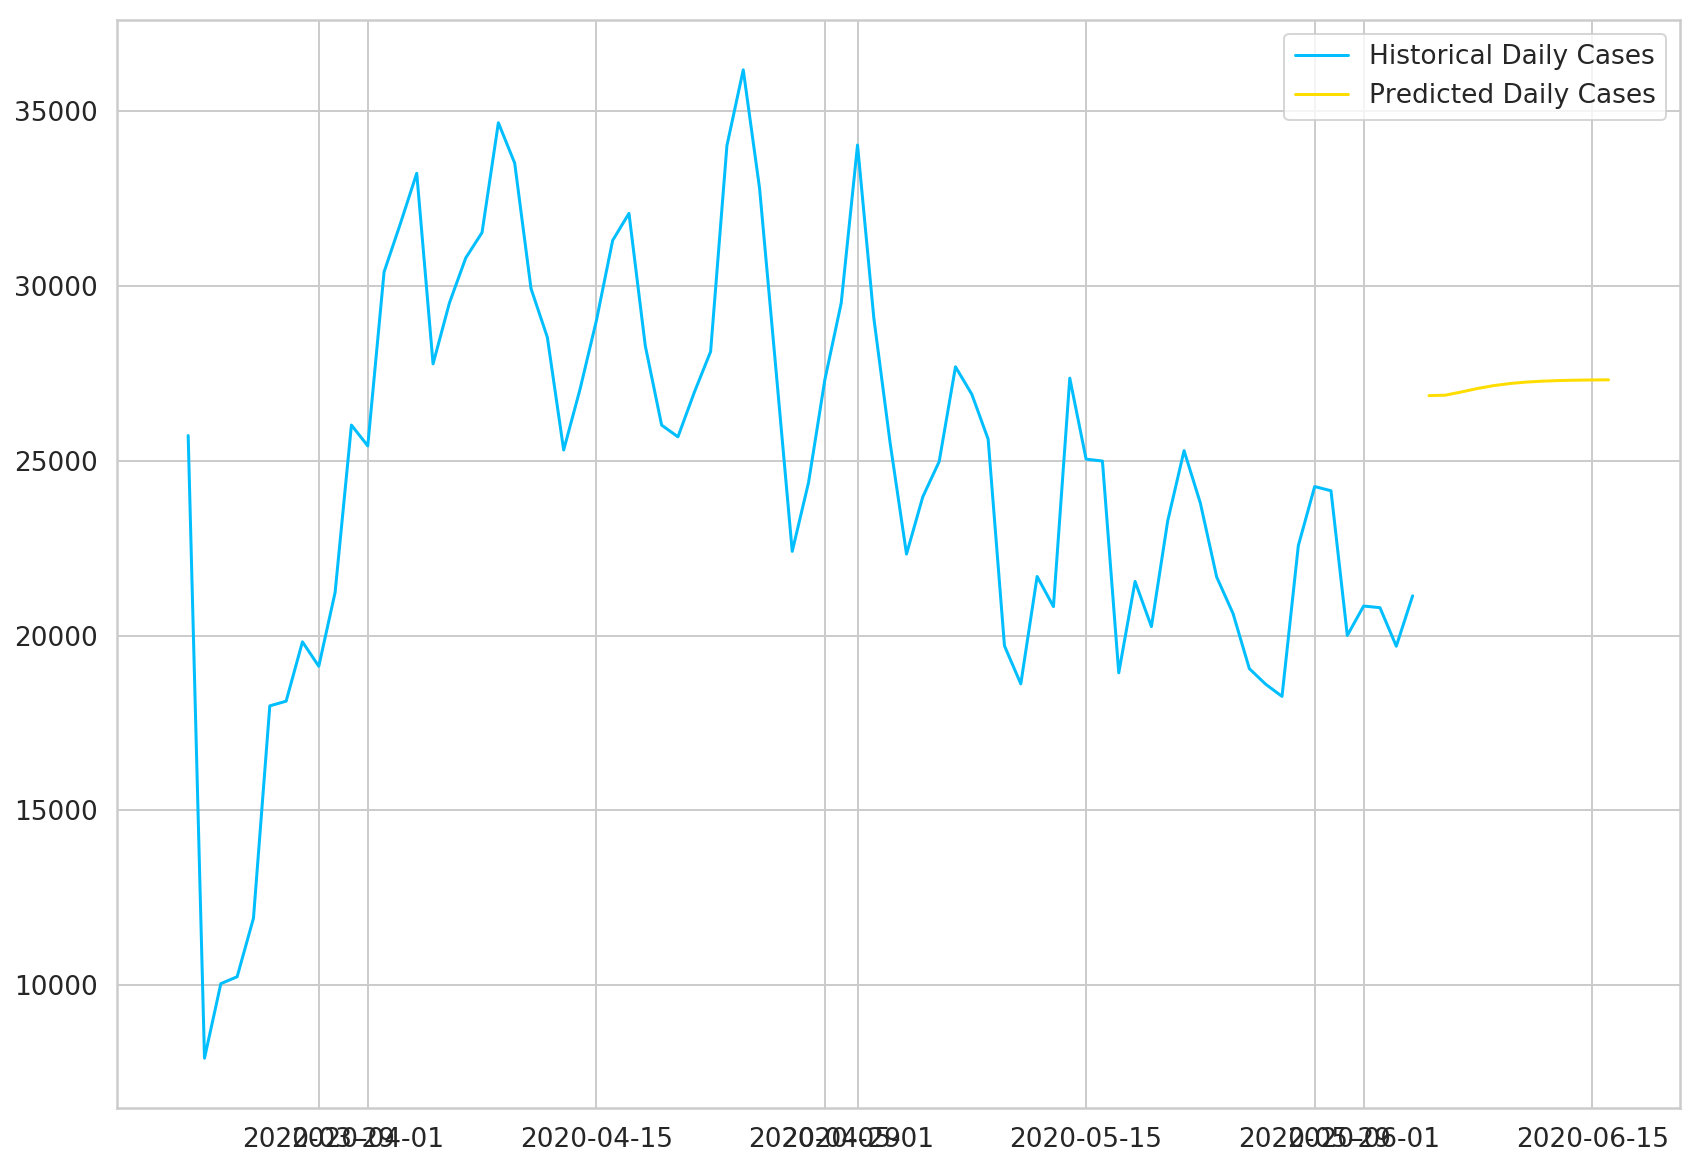

In [176]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

In [320]:
#df = pd.read_csv("time_series_covid_19_confirmed.csv", parse_dates=True, squeeze=True)

In [321]:
#df.head()

In [322]:
#df_lstm = df_lstm.iloc[:,10:]

In [323]:
#df_lstm.head(20)

# --------------------------------------------------------------------------------------------------------


# AutoEncoder Module

# ------------------------------------------------------------------------------------------------------

# NLP Module (news)

In [177]:
df_news = pd.read_csv("/home/yazdan/Desktop/Papers/Covid/news/COVID-19_AllResearchPapers_LemmatizedInformation.csv")

In [178]:
df_news.head(20)

,paper_id,title,authors,affiliations,abstract,text,bibliography,document_keyword
0,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,"Julien Mélade, Nicolas Wieseke 4#, Beza Ramazi...","Julien Mélade (2 rue Maxime Rivière, 97490 Sai...",NaN,\n\n- Figure S1 : Phylogeny of all sequences b...,"NDV/HQ266603/Chicken/1992, , , None; MuV/FJ375...","supplementary,information,eco,epidemiological,..."
1,00142f93c18b07350be89e96372d240372437ed9,immunity to pathogens taught by specialized hu...,"Elisabetta Padovan, Marina Cella, Shahram Sale...","Elisabetta Padovan, Marina Cella, Shahram Sale...",Abstract\n\nDendritic cells (DCs) are speciali...,\n\niNTRODUCTiON Human beings are constantly e...,The dendritic cell system and its role in immu...,"immunity,pathogen,teach,specialized,human,dend..."
2,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...","Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...",Abstract\n\nword count: 194 22 Text word count...,"\n\nVP3, and VP0 (which is further processed t...",Genetic economy in 598 picornaviruses: Foot-an...,"rna,pseudoknots,foot,mouth,disease,virus,dispe..."
3,0022796bb2112abd2e6423ba2d57751db06049fb,Public Health Responses to and Challenges for ...,"Elvina Viennet, Scott A Ritchie, Craig R Willi...",Elvina Viennet (The Australian National Univer...,Abstract\n\nDengue has a negative impact in lo...,Introduction\n\nPathogens and vectors can now ...,"The global distribution and burden of dengue, ...","public,health,response,challenge,control,dengu..."
4,002f09dfc9a1323a15bf72e349d8b733ac97a2aa,NaN,NaN,NaN,NaN,\n\nT he modern word camel is derived from the...,Ancient and modern DNA reveal dynamics of dome...,"modern,word,camel,derive,latin,word,camelus,gr..."
5,00326efcca0852dc6e39dc6b7786267e1bc4f194,a section of the journal Frontiers in Pediatri...,"Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Abstract\n\nFifteen years ago, United Nations ...",\n\nIn addition to preventative care and nutri...,"Global, regional, and national levels of neona...","section,journal,frontier,pediatrics,review,ped..."
6,00352a58c8766861effed18a4b079d1683fec2ec,MINI REVIEW Function of the Deubiquitinating E...,"Molly Hodul, Caroline L Dahlberg, Peter Juo, C...","Molly Hodul (Tufts University, Boston, MA, Uni...",Abstract\n\nPosttranslational modification of ...,INTRODUCTION\n\nUbiquitination is a widely use...,Regulation of AMPA receptor trafficking and sy...,"mini,review,function,deubiquitinating,enzyme,n..."
7,0036b28fddf7e93da0970303672934ea2f9944e7,The fecal microbiota and unconjugated fecal bi...,"B Ruggerone, A C Manchester, F Del Baldo, F Fr...","B Ruggerone (University of Thessaly, Karditsa,...",Abstract\n\nand Blautia (P = 0.008) significan...,\n\nhuman type 1 DM. The aim of this study was...,Significant Feline Proteinuria: a retrospectiv...,"fecal,microbiota,unconjugated,fecal,bile,acid,..."
8,0036e8891c93ae63611bde179ada1e03e8577dea,Stable Occupancy of the Crimean-Congo Hemorrha...,"Florine E M Scholte, Brian L Hua, Jessica R Sp...",Florine E M Scholte (National Center for Emerg...,Abstract\n\nCrimean-Congo hemorrhagic fever vi...,\n\nto Western Europe with the assistance of m...,Seroepidemiological studies of Crimean-Congo h...,"stable,occupancy,crimean,congo,hemorrhagic,fev..."
9,0043d044273b8eb1585d3a66061e9b4e03edc062,Evaluation of the tuberculosis programme in Ni...,"Yu Rong Yang, Donald P Mcmanus, Darren J Gray,...","Yu Rong Yang, Donald P Mcmanus, Darren J Gray,...",Abstract\n\nBackground: Tuberculosis is a deva...,Background\n\nThe Ministry of Health of the Pe...,Analysis of factors affecting the epidemiology...,"evaluation,tuberculosis,programme,ningxia,hui,..."


In [179]:
df_news["Fake_date"] = np.random.choice(pd.date_range('2020-01-23', '2020-06-04'), len(df_news))

In [180]:
df_news.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,document_keyword,Fake_date
0,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,"Julien Mélade, Nicolas Wieseke 4#, Beza Ramazi...","Julien Mélade (2 rue Maxime Rivière, 97490 Sai...",NaN,\n\n- Figure S1 : Phylogeny of all sequences b...,"NDV/HQ266603/Chicken/1992, , , None; MuV/FJ375...","supplementary,information,eco,epidemiological,...",2020-05-04
1,00142f93c18b07350be89e96372d240372437ed9,immunity to pathogens taught by specialized hu...,"Elisabetta Padovan, Marina Cella, Shahram Sale...","Elisabetta Padovan, Marina Cella, Shahram Sale...",Abstract\n\nDendritic cells (DCs) are speciali...,\n\niNTRODUCTiON Human beings are constantly e...,The dendritic cell system and its role in immu...,"immunity,pathogen,teach,specialized,human,dend...",2020-04-24
2,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...","Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...",Abstract\n\nword count: 194 22 Text word count...,"\n\nVP3, and VP0 (which is further processed t...",Genetic economy in 598 picornaviruses: Foot-an...,"rna,pseudoknots,foot,mouth,disease,virus,dispe...",2020-02-06
3,0022796bb2112abd2e6423ba2d57751db06049fb,Public Health Responses to and Challenges for ...,"Elvina Viennet, Scott A Ritchie, Craig R Willi...",Elvina Viennet (The Australian National Univer...,Abstract\n\nDengue has a negative impact in lo...,Introduction\n\nPathogens and vectors can now ...,"The global distribution and burden of dengue, ...","public,health,response,challenge,control,dengu...",2020-05-08
4,002f09dfc9a1323a15bf72e349d8b733ac97a2aa,NaN,NaN,NaN,NaN,\n\nT he modern word camel is derived from the...,Ancient and modern DNA reveal dynamics of dome...,"modern,word,camel,derive,latin,word,camelus,gr...",2020-04-03


In [181]:
df_news['Fake_date']

0       2020-05-04
1       2020-04-24
2       2020-02-06
3       2020-05-08
4       2020-04-03
5       2020-02-12
6       2020-05-04
7       2020-05-23
8       2020-04-06
9       2020-04-19
10      2020-05-18
11      2020-05-01
12      2020-05-05
13      2020-06-01
14      2020-03-15
15      2020-01-24
16      2020-04-19
17      2020-02-29
18      2020-05-31
19      2020-02-12
20      2020-03-20
21      2020-02-13
22      2020-04-20
23      2020-03-11
24      2020-03-21
25      2020-02-06
26      2020-03-13
27      2020-05-09
28      2020-03-17
29      2020-03-26
           ...    
13172   2020-04-07
13173   2020-04-18
13174   2020-04-25
13175   2020-03-23
13176   2020-02-20
13177   2020-04-26
13178   2020-02-09
13179   2020-03-03
13180   2020-06-02
13181   2020-03-03
13182   2020-05-24
13183   2020-02-13
13184   2020-04-11
13185   2020-05-31
13186   2020-02-27
13187   2020-02-11
13188   2020-03-29
13189   2020-05-21
13190   2020-03-17
13191   2020-03-28
13192   2020-02-17
13193   2020

In [182]:
df_news.sort_values(by=['Fake_date'], inplace=True, ascending=True)

In [183]:
df_news.shape

(13202, 9)

In [187]:
df_news['Province'] = np.random.choice(df.Province_State.unique(),len(df_news))

In [189]:
df_news.head(20)

,paper_id,title,authors,affiliations,abstract,text,bibliography,document_keyword,Fake_date,Province
9848,bef31fcf85c2a93a2eeae36e5574372c3aa1c8f1,Characterization of rhinovirus C from a 4-year...,"Ageng Wiyatno, E S Zul Febrianti, Aghnianditya...","Ageng Wiyatno, E S Zul Febrianti, Aghnianditya...","Abstract\n\nIntroduction. Myocarditis, inflamm...",INTRODUCTION\n\nDilated cardiomyopathy (DCM) i...,"Incidence, causes, and outcomes of dilated car...","characterization,rhinovirus,year,old,boy,acute...",2020-01-23,District of Columbia
7971,991aed7275084ce0661be421e281a8f47dcc8637,Selective Preference of Parallel DNA Triplexes...,"Gunaseelan Goldsmith, Thenmalarchelvi Rathinav...",Gunaseelan Goldsmith (Electronics City Phase I...,Abstract\n\nPLOS ONE |\n\n,"\n\nImplications of DNA, RNA and RNA.DNA hybri...",Monitoring DNA triplex formation using multico...,"selective,preference,parallel,dna,triplexes,du...",2020-01-23,South Dakota
4920,5f52ac4738312fdb215ad06e5a2e886a6fb63efd,SUP PLE MEN TAL MAT ERI AL,Napier,Napier,NaN,\n\n. Biallelic mutations using CRI SPR-Cas9 i...,Enhanced monocyte response and decreased centr...,"sup,ple,men,tal,mat,eri,al,napier,napier,biall...",2020-01-23,Pennsylvania
5644,6cabb9dc94d381013cd38885a5f0af29490c74f6,Online Resource Supplemental Material 1 Acta N...,"Rebeka Fekete, Csaba Cserép, Nikolett Lénárt, ...","Rebeka Fekete, Csaba Cserép, Nikolett Lénárt, ...",NaN,Supplementary Figures 1-16\n\nSupplementary Ta...,"For flow cytometric analysis, Fc receptor bloc...","online,resource,supplemental,material,acta,neu...",2020-01-23,Oregon
13038,fccf6791aac676cf26c0be7745e217f9b8d6336c,Antipsychotic behavioral phenotypes in the mou...,"Giusti -Rodríguez, P , J , Paola Giusti-Rodríg...",Giusti -Rodríguez (University of North Carolin...,Abstract\n\nSchizophrenia is an idiopathic dis...,"INTRODUCTION\n\nSchizophrenia is a chronic, se...",Diagnostic and statistical manual of mental di...,"antipsychotic,behavioral,phenotype,mouse,colla...",2020-01-23,Oregon
10295,c7fbc3c2ef9549d8a6531237b2e9d09cf09a6567,Microfluidics-Based Lab-on-Chip Systems in DNA...,"Sabo Wada Dutse, Nor Azah Yusof","Sabo Wada Dutse (Universiti Putra Malaysia, 43...",Abstract\n\nMicrofluidics-based lab-on-chip (L...,Introduction\n\nAdvances in microfluidics for ...,Pathogen detection: A perpective of traditiona...,"microfluidics,base,lab,chip,system,dna,base,bi...",2020-01-23,North Carolina
7813,96456a955d56878dc1e53c0feeb14bf307518b17,Programmed Ribosomal Frameshift Alters Express...,"E B Melian, S Hall-Mendelin, F Du, N Owens, A ...","E B Melian, S Hall-Mendelin, F Du, N Owens, A ...",Abstract\n\nWest Nile virus (WNV) is a human p...,Introduction\n\nWest Nile virus (WNV) is a fla...,"Structure of immature West Nile virus, Y Zhang...","program,ribosomal,frameshift,alters,expression...",2020-01-23,Connecticut
843,111b9a6e91c938696fcdb4cb128b8ae739dbe11c,Clinical features and sexual transmission pote...,"Pengfei Cui, Zhe Chen, Tian Wang, Jun Dai, Jin...","Pengfei Cui, Zhe Chen, Tian Wang, Jun Dai, Jin...","Abstract\n\nBackground: As of March 2, 2020, S...","\n\n. In addition, SARS-CoV was detected in ur...",A Novel Coronavirus from Patients with Pneumon...,"clinical,feature,sexual,transmission,potential...",2020-01-23,Tennessee
744,0f3ba0147ba55673ad30d983c9c850e0e327d1cd,NaN,"Gayle Langley, William Schaffner, Monica M Far...","Gayle Langley, William Schaffner, Monica M Far...",Abstract\n\nActive Bacterial Core surveillance...,\n\nA ctive Bacterial Core surveillance (ABCs)...,Preventing emerging infectious diseases: a str...,"gayle,langley,william,schaffner,monica,farley,...",2020-01-23,Virgin Islands
711,0e547f3723a50ef4f55c873f2a65dfbee42cd655,Protocol for Metagenomic Virus Detection in Cl...,NaN,NaN,NaN,\n\n(10 −1 -10 −9 ) plus 1 negative control (p...,Isolation and characterization of three mammal...,"protocol,metagenomic,virus,detection,clinical,...",2020-01-23,Guam


# ------------------------------------------------------------------------------------------------------------

# Multi-layer Perceptron 